# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn .ensemble import IsolationForest
import eda_helper_functions

# 2. Read the Training Data

In [3]:
file_path = r"C:\Users\msved\OneDrive\Documents\Campus X\FLIGHT PREDICTION USING AWS SAGEMAKER\data\train.csv"
train = pd.read_csv(file_path)
train

,date_of_journey,airlines,airlines_code,class,departure,total_stops,arrival,duration_in_minutes,source,destination,price_fare
0,2024-04-01,Vistara,UK-855,Premium Economy,00:26:00,1.0,07:27:00,334.8,Delhi,Cochin,23238
1,2024-03-26,Air India,AI-443,Economy,12:19:00,1.0,05:17:00,304.8,Kolkata,Banglore,8516
2,2024-12-09,Air India,AI-815,Business,10:46:00,1.0,18:57:00,355.2,Delhi,Cochin,53164
3,2024-09-08,Go First,G8-2519,Economy,21:06:00,0.0,13:02:00,850.2,Banglore,Delhi,6873
4,2024-05-04,Vistara,UK-929,Business,18:15:00,1.0,02:34:00,535.2,Kolkata,Banglore,22297
...,...,...,...,...,...,...,...,...,...,...,...
6831,2024-08-05,Vistara,UK-969,Business,00:44:00,0.0,17:15:00,1485.0,Banglore,Delhi,30249
6832,2024-07-27,Vistara,UK-995,Business,21:39:00,1.0,09:48:00,135.0,Delhi,Cochin,41528
6833,2024-08-14,Air India,AI-887,Business,09:21:00,0.0,07:38:00,135.0,Banglore,Delhi,25612
6834,2024-02-21,Indigo,6E-6475,Economy,07:53:00,1.0,17:31:00,589.8,Delhi,Cochin,6672


## 2.1 Data type Fixing


In [4]:
train.dtypes

date_of_journey         object
airlines                object
airlines_code           object
class                   object
departure               object
total_stops            float64
arrival                 object
duration_in_minutes    float64
source                  object
destination             object
price_fare               int64
dtype: object

In [5]:
train = train.assign(**{
    
    col : pd.to_datetime(train.loc[:,col], format="mixed")
    for col in ['date_of_journey','departure','arrival']
    
})

In [6]:
train.dtypes

date_of_journey        datetime64[ns]
airlines                       object
airlines_code                  object
class                          object
departure              datetime64[ns]
total_stops                   float64
arrival                datetime64[ns]
duration_in_minutes           float64
source                         object
destination                    object
price_fare                      int64
dtype: object

# 3. Hight level data summary

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6836 entries, 0 to 6835
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_of_journey      6836 non-null   datetime64[ns]
 1   airlines             6836 non-null   object        
 2   airlines_code        6836 non-null   object        
 3   class                6836 non-null   object        
 4   departure            6836 non-null   datetime64[ns]
 5   total_stops          6836 non-null   float64       
 6   arrival              6836 non-null   datetime64[ns]
 7   duration_in_minutes  6836 non-null   float64       
 8   source               6836 non-null   object        
 9   destination          6836 non-null   object        
 10  price_fare           6836 non-null   int64         
dtypes: datetime64[ns](3), float64(2), int64(1), object(5)
memory usage: 587.6+ KB


In [8]:
train.describe(include="number")

,total_stops,duration_in_minutes,price_fare
count,6836.000000,6836.000000,6836.000000
mean,0.825922,607.398098,20751.899064
std,0.674420,417.208384,18163.540209
min,0.000000,115.200000,3818.000000
25%,0.000000,289.800000,7704.000000
50%,1.000000,505.200000,12262.000000
75%,1.000000,865.200000,29805.000000
max,3.000000,1714.800000,102041.000000


In [9]:
train.describe(include = "O")

,airlines,airlines_code,class,source,destination
count,6836,6836,6836,6836,6836
unique,7,200,4,5,6
top,Vistara,UK-819,Economy,Delhi,Cochin
freq,3164,144,3706,2887,2887


In [10]:
# changing stops data type to object from float 
(
train
    .assign(total_stops = train["total_stops"].astype(object))
    .describe(include = 'O')
)

,airlines,airlines_code,class,total_stops,source,destination
count,6836,6836,6836,6836.0,6836,6836
unique,7,200,4,4.0,5,6
top,Vistara,UK-819,Economy,1.0,Delhi,Cochin
freq,3164,144,3706,3622.0,2887,2887


In [11]:
train['class'].unique()

array(['Premium Economy', 'Economy', 'Business', 'First'], dtype=object)

## 3.1 Observation
- Vistara is occuring 3164 times as airline in 6836 observations.
- UK-819 is the common airline code, occuring 144 times. 
- Also, chances of delhi as source and coachin as destination is around 25%.

# 4. Analysis of outliers


In [12]:
forest = IsolationForest(n_estimators = 10 , random_state = 50)

In [13]:
(
train
    .assign(
    outlier  = forest.fit_predict(
        train
            .drop(columns="price_fare")
            .select_dtypes(include="number")
                                 )
    ).query("outlier==-1")
)

,date_of_journey,airlines,airlines_code,class,departure,total_stops,arrival,duration_in_minutes,source,destination,price_fare,outlier
6,2024-01-06,Indigo,6E-2216,Economy,2024-05-25 15:45:00,0.0,2024-05-25 04:02:00,505.2,Chennai,Kolkata,6442,-1
7,2024-05-04,Air India,AI-463,Business,2024-05-25 10:39:00,0.0,2024-05-25 14:41:00,1660.2,Banglore,Delhi,35532,-1
9,2024-03-01,Go First,G8-717,Economy,2024-05-25 13:14:00,0.0,2024-05-25 18:49:00,300.0,Kolkata,Banglore,5252,-1
12,2024-09-28,Vistara,UK-963,Economy,2024-05-25 21:16:00,2.0,2024-05-25 00:56:00,139.8,Mumbai,Hyderabad,6795,-1
13,2024-05-06,Air India,AI-805,Economy,2024-05-25 08:05:00,0.0,2024-05-25 06:18:00,130.2,Banglore,Delhi,5955,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
6827,2024-12-02,Vistara,UK-815,Premium Economy,2024-05-25 03:57:00,1.0,2024-05-25 14:59:00,1450.2,Delhi,Cochin,11943,-1
6828,2024-11-17,Vistara,UK-929,Economy,2024-05-25 13:44:00,1.0,2024-05-25 22:52:00,1285.2,Delhi,Cochin,14612,-1
6831,2024-08-05,Vistara,UK-969,Business,2024-05-25 00:44:00,0.0,2024-05-25 17:15:00,1485.0,Banglore,Delhi,30249,-1
6833,2024-08-14,Air India,AI-887,Business,2024-05-25 09:21:00,0.0,2024-05-25 07:38:00,135.0,Banglore,Delhi,25612,-1


# 5. Pair Plot

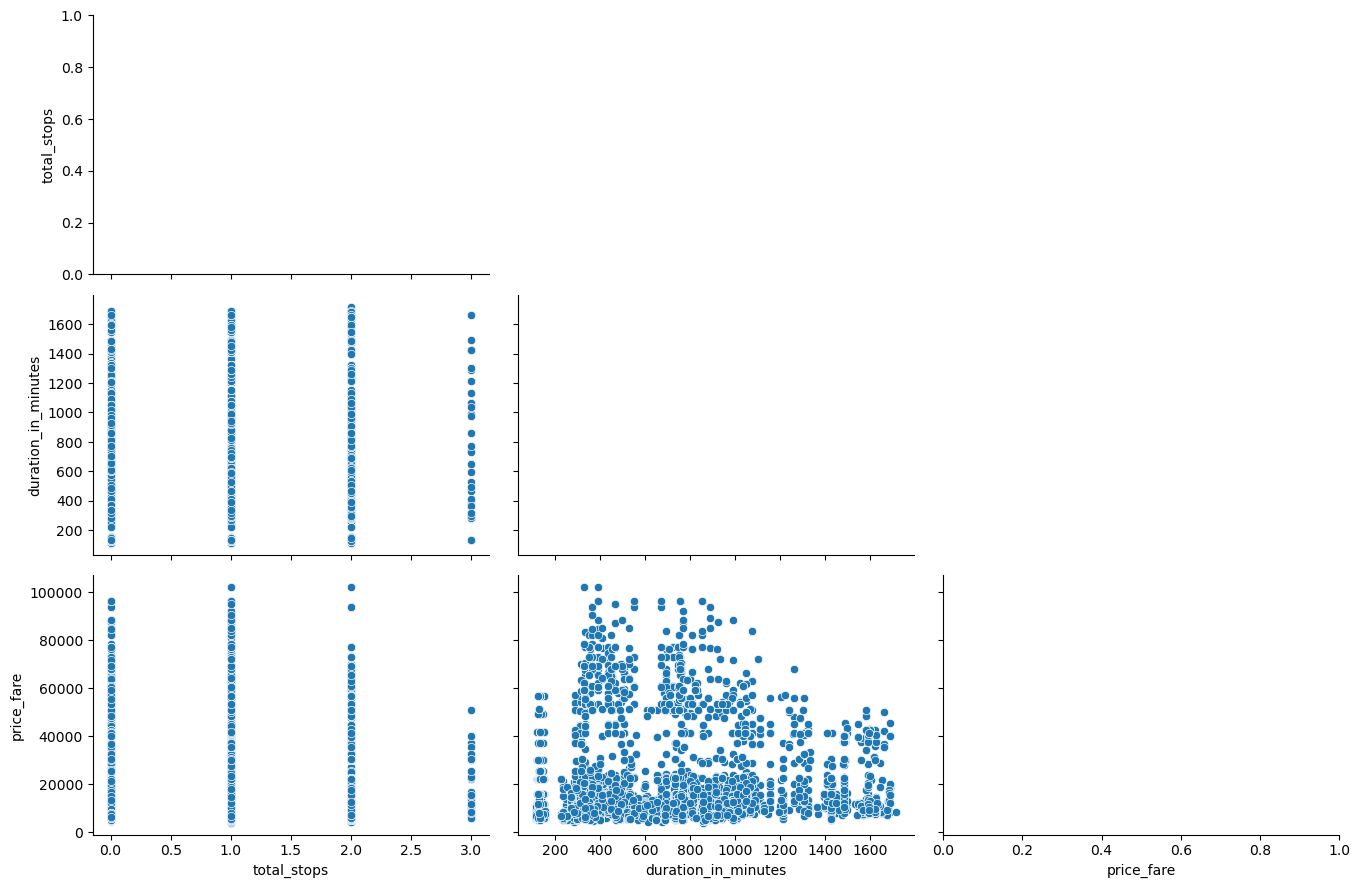

In [14]:
eda_helper_functions.pair_plots(train)

# 6. Correlation Analysis

c:\Users\msved\anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


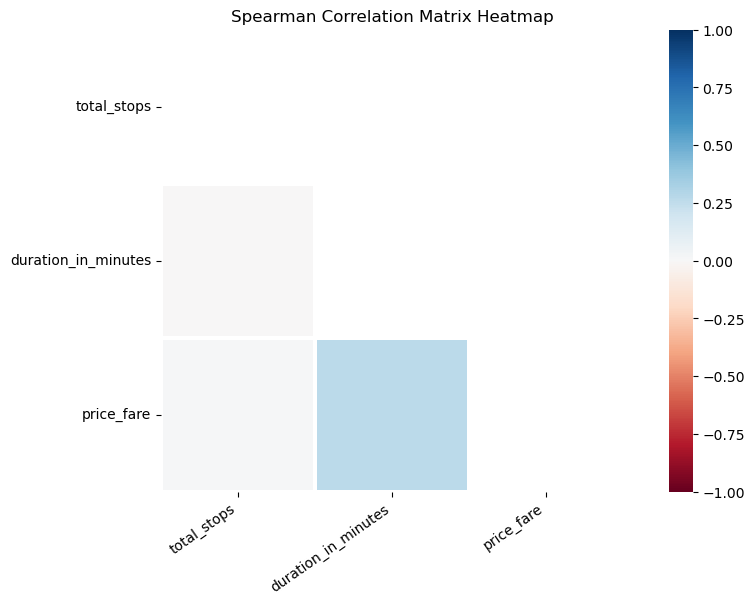

In [15]:
eda_helper_functions.correlation_heatmap(train)

c:\Users\msved\anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


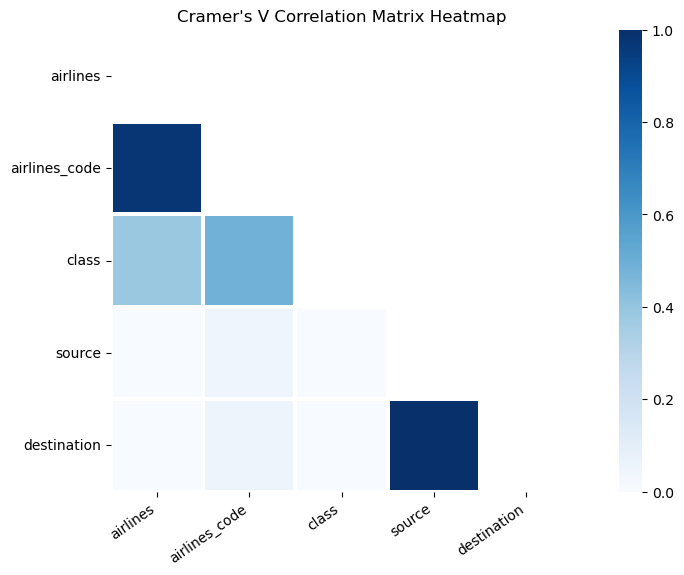

In [16]:
eda_helper_functions.cramersV_heatmap(train)

# 7. Analysis in detail

In [17]:
train.columns


Index(['date_of_journey', 'airlines', 'airlines_code', 'class', 'departure',
       'total_stops', 'arrival', 'duration_in_minutes', 'source',
       'destination', 'price_fare'],
      dtype='object')

## 7.1 airline category

In [18]:
train.airlines


0         Vistara
1       Air India
2       Air India
3        Go First
4         Vistara
          ...    
6831      Vistara
6832      Vistara
6833    Air India
6834       Indigo
6835    Air India
Name: airlines, Length: 6836, dtype: object

In [19]:
eda_helper_functions.cat_summary(train,"airlines")
#  cat_summary means category summary and if we do seperately, then normalize=True will give the numbers in % format.

0         Vistara
1       Air India
2       Air India
3        Go First
4         Vistara
          ...    
6831      Vistara
6832      Vistara
6833    Air India
6834       Indigo
6835    Air India
Name: airlines, Length: 6836, dtype: object

Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,836 / 6,836 rows


,
count,6836
unique,7
top,Vistara
freq,3164


,count,percentage
category,,
Vistara,3164,0.462844
Air India,1964,0.287303
Indigo,814,0.119075
Go First,457,0.066852
Air Asia,336,0.049152
Spicejet,81,0.011849
Akasa Air,20,0.002926


## Univariate Analysis of airline:

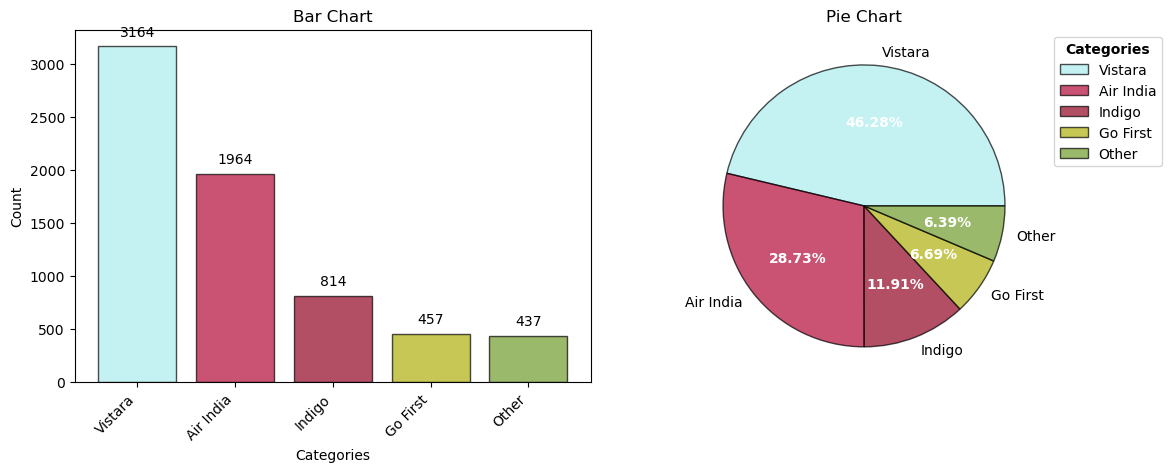

In [20]:
eda_helper_functions.cat_univar_plots(train, "airlines",show_wordcloud=False,k=4)
# k = 4 means it will select top 4 frequencies and combine rest of the categories into 1

## Bi-variate Analysis between airline and price

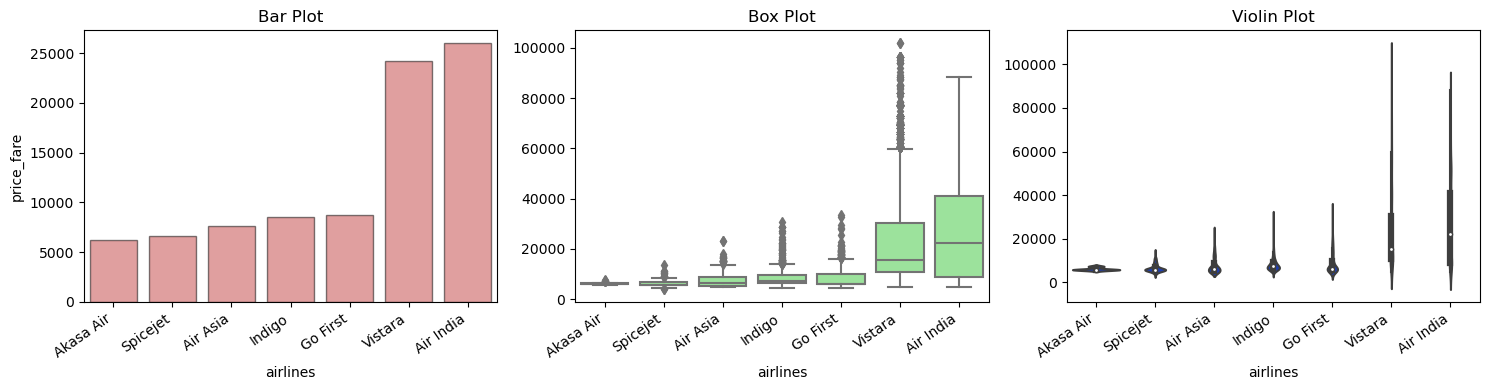

In [21]:
eda_helper_functions.num_cat_bivar_plots(
data=train,
num_var="price_fare",
cat_var="airlines"
)

- From the above graph, it is observed that airlines and price fare is correlated and from box plot.

In [22]:
eda_helper_functions.num_cat_hyp_testing(train, "price_fare", "airlines")


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 213.91338277721047
- p-value              : 5.9297483245072296e-251
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_fare and airlines are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 2030.588875075011
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price_fare and airlines are associated to each other


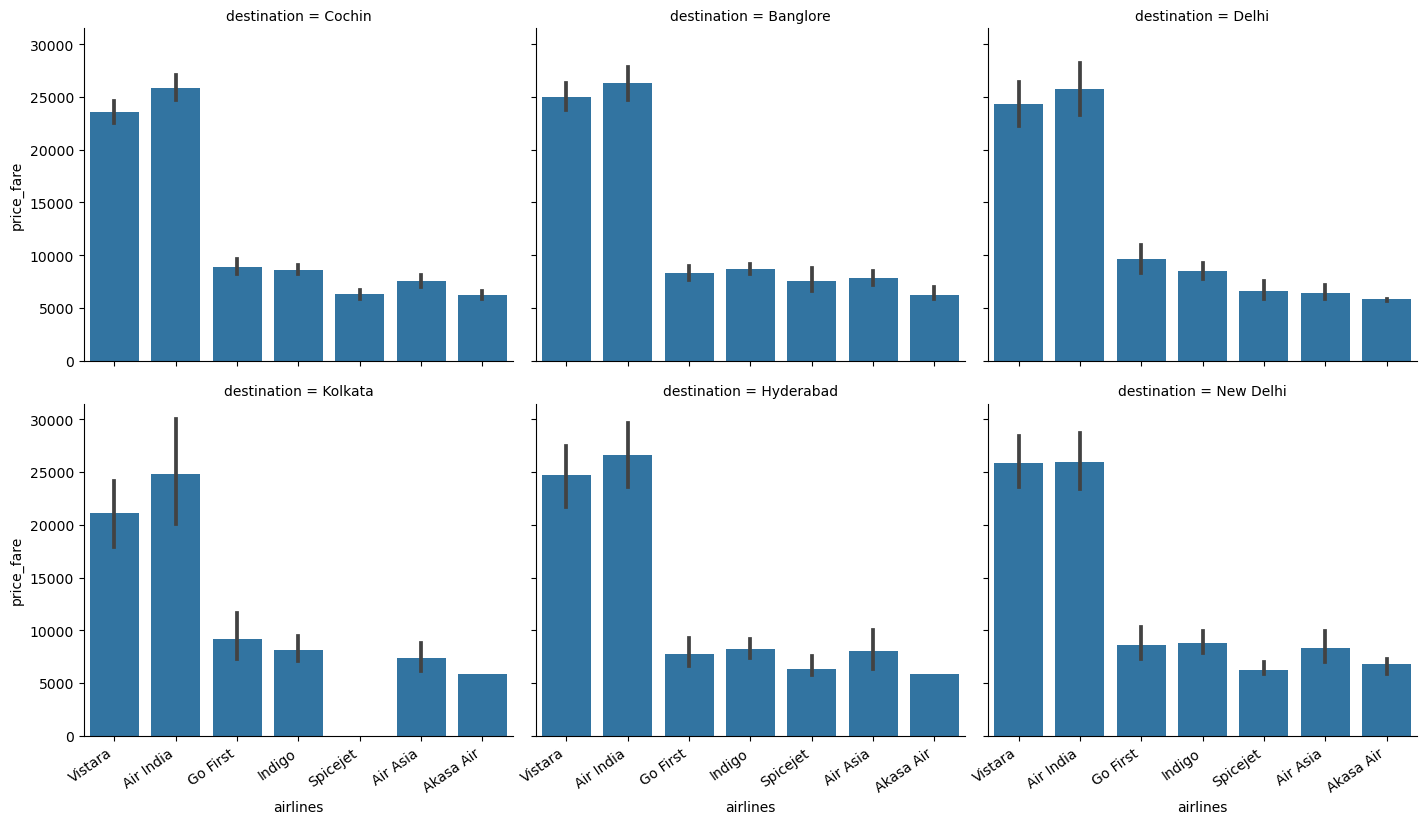

In [23]:
airline_grid = sns.FacetGrid(
data=train,
col="destination",
col_wrap=3,
height=4,
aspect=1.2,
sharey=True
)

airline_grid.map(sns.barplot, "airlines", "price_fare", order=train.airlines.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

## 8.2 date_of_journey

In [24]:
train.date_of_journey


0      2024-04-01
1      2024-03-26
2      2024-12-09
3      2024-09-08
4      2024-05-04
          ...    
6831   2024-08-05
6832   2024-07-27
6833   2024-08-14
6834   2024-02-21
6835   2024-10-27
Name: date_of_journey, Length: 6836, dtype: datetime64[ns]

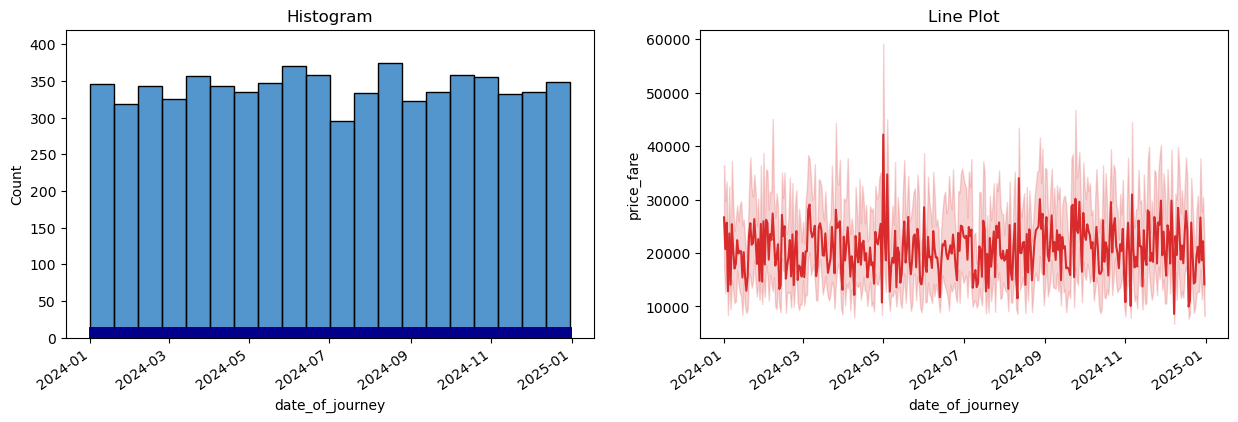

In [25]:
eda_helper_functions.dt_univar_plots(
data=train,
var="date_of_journey",
target="price_fare"
)

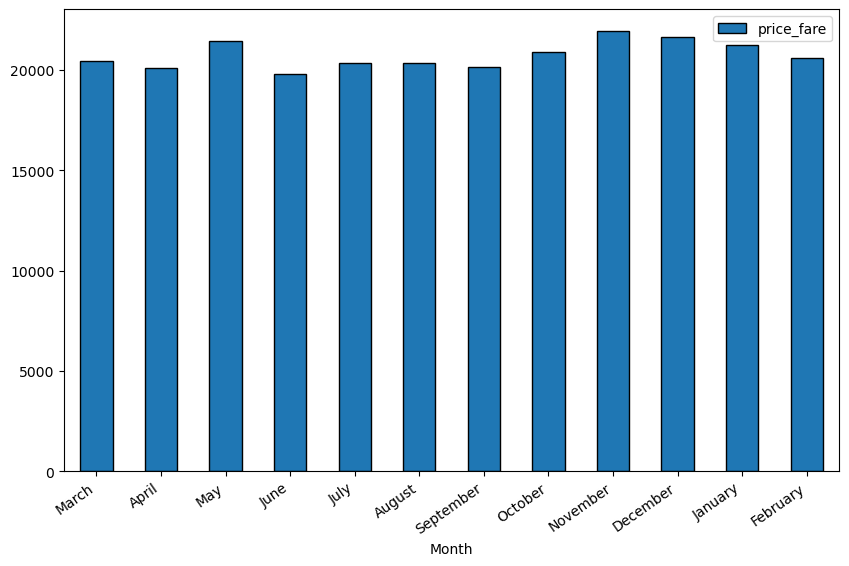

In [26]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price_fare.mean()
    .to_frame()
    .set_axis(["March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "January", "February"], axis=0)  # Update axis labels with all months
    .rename_axis(index="Month")
    .plot(
        kind="bar",
        figsize=(10, 6),
        edgecolor="black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)


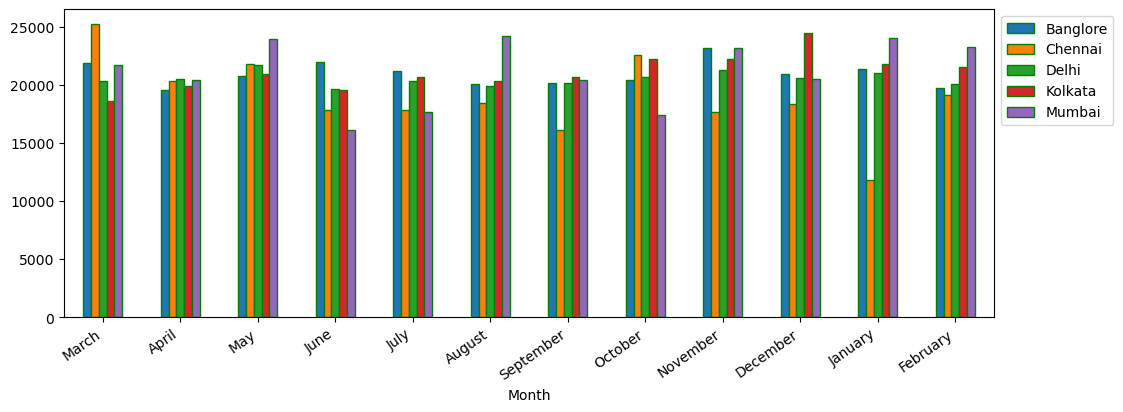

In [27]:

(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price_fare.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "January", "February"], axis=0)
	.rename_axis(index="Month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="green"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

## 8.3 Departure

In [28]:
train.departure

0      2024-05-25 00:26:00
1      2024-05-25 12:19:00
2      2024-05-25 10:46:00
3      2024-05-25 21:06:00
4      2024-05-25 18:15:00
               ...        
6831   2024-05-25 00:44:00
6832   2024-05-25 21:39:00
6833   2024-05-25 09:21:00
6834   2024-05-25 07:53:00
6835   2024-05-25 01:36:00
Name: departure, Length: 6836, dtype: datetime64[ns]

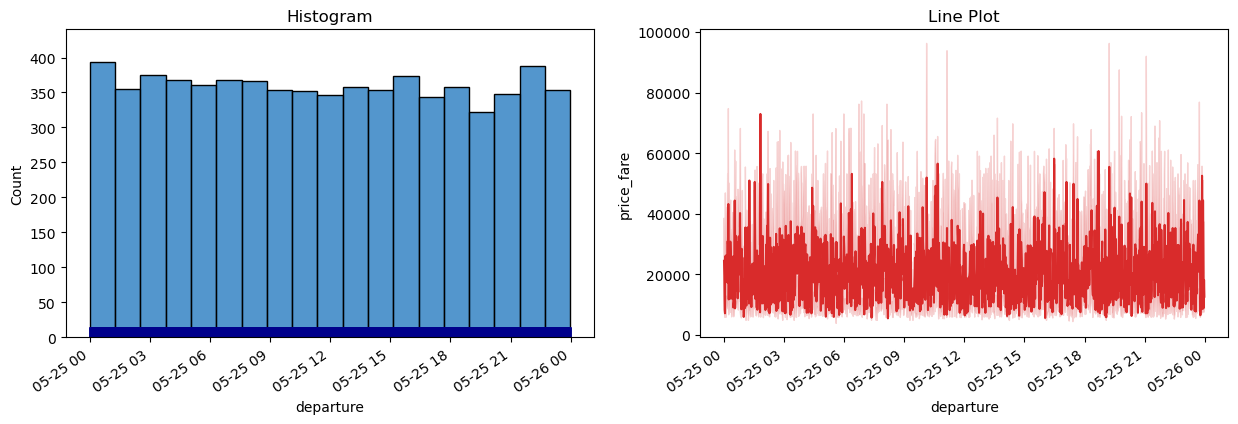

In [29]:
eda_helper_functions.dt_univar_plots(train, "departure", "price_fare")


## 8.4 Duration

In [30]:
train.duration_in_minutes

0        334.8
1        304.8
2        355.2
3        850.2
4        535.2
         ...  
6831    1485.0
6832     135.0
6833     135.0
6834     589.8
6835     145.2
Name: duration_in_minutes, Length: 6836, dtype: float64

In [31]:
eda_helper_functions.num_summary(train, "duration_in_minutes")


0        334.8
1        304.8
2        355.2
3        850.2
4        535.2
         ...  
6831    1485.0
6832     135.0
6833     135.0
6834     589.8
6835     145.2
Name: duration_in_minutes, Length: 6836, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,836 / 6,836 rows


,value
percentile,
0,115.2
5,130.2
10,135.0
25,289.8
50,505.2
75,865.2
90,1240.2
95,1485.0
99,1624.8


,value
mean,607.398098
trimmed mean (5%),579.685993
trimmed mean (10%),557.920256
median,505.200000


,value
var,174062.835853
std,417.208384
IQR,575.400000
mad,334.800000
coef_variance,0.686878


,value
skewness,0.747087
kurtosis,-0.245502


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.9588273140577275e-52
Test Statistic       : 0.913297252143948
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 155.57964761923722
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [32]:
train.duration_in_minutes.quantile([0.25, 0.5, 0.75])


0.25    289.8
0.50    505.2
0.75    865.2
Name: duration_in_minutes, dtype: float64

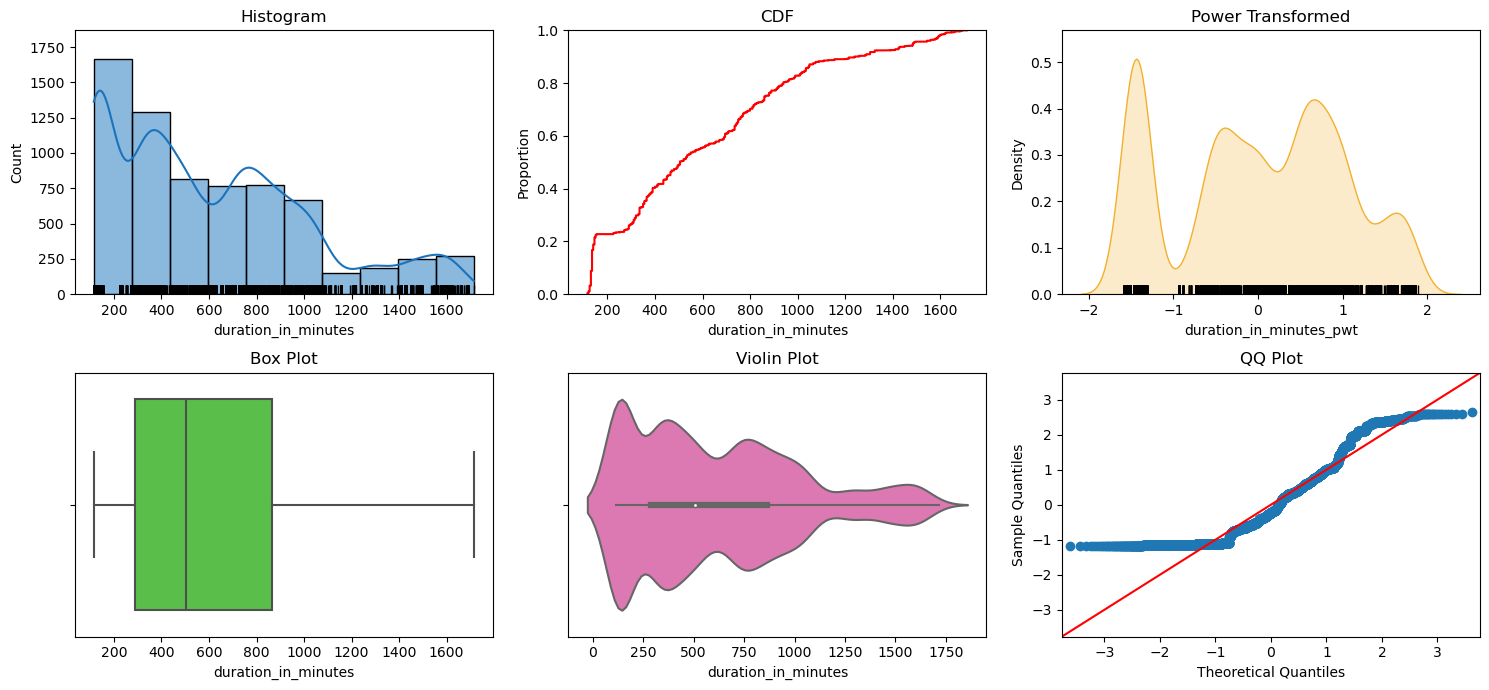

In [33]:
eda_helper_functions.num_univar_plots(train, "duration_in_minutes")


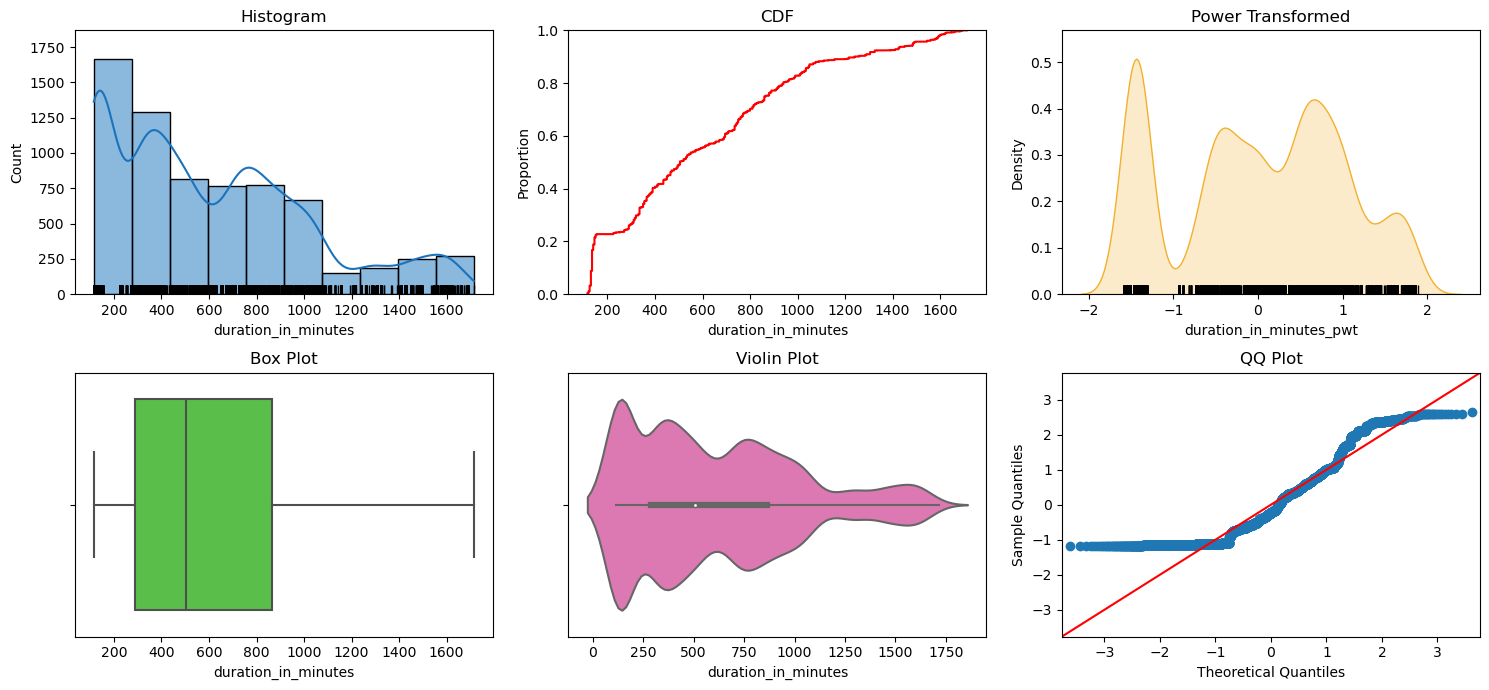

In [34]:
eda_helper_functions.num_univar_plots(train, "duration_in_minutes")

In [35]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration_in_minutes",
	"price_fare",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [ ]:
eda_helper_functions.num_num_hyp_testing(train, "price_fare", "duration_in_minutes")


In [ ]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True,
    height = 3
)

duration_grid.map(sns.scatterplot, "duration_in_minutes", "price_fare")

duration_grid.add_legend()

In [ ]:
eda_helper_functions.get_iqr_outliers(train, "duration_in_minutes")


# 9. Automated EDA

In [ ]:
%pip install ydata-profiling --user

from ydata_profiling import ProfileReport
report = ProfileReport(train)
report.to_file(output_file="output.html")